# Einleitung:

Die Vielfalt der regionalen Küchen und Kochstile auf der ganzen Welt ist faszinierend. Von der pikanten Gewürzmischung in der indischen Küche bis hin zur zarten Perfektion der französischen Patisserie gibt es unzählige Geschmackserlebnisse, die von Land zu Land variieren. Diese Vielfalt ist das Ergebnis einer langen Geschichte, kultureller Einflüsse und vor allem der Verfügbarkeit von Zutaten.

Die regionalen Kochstile wurden historisch und kulturell oft stark von der Verfügbarkeit bestimmter Zutaten geprägt. Nehmen wir zum Beispiel das Gewürz Safran. Es ist bekannt für seinen einzigartigen Geschmack und wird in der spanischen Küche verwendet, insbesondere in der berühmten Paella. Safran ist jedoch nicht überall in der Welt erhältlich, da er aus den Blütennarben der Safrankrokusblume gewonnen wird, die nur in bestimmten Regionen gedeiht. Die Verfügbarkeit von Safran hat daher die Entwicklung der spanischen Küche maßgeblich beeinflusst.

Ein weiteres Beispiel ist die Verwendung von Kokosnuss in der thailändischen Küche. Kokospalmen wachsen vor allem in tropischen Gebieten, daher ist Kokosnussöl, Milch und geriebene Kokosnuss eine wichtige Zutat in der thailändischen Küche. Die reichhaltige Verwendung von Kokosnuss verleiht den thailändischen Gerichten ihren charakteristischen Geschmack und macht sie unverwechselbar.

Früher war die Verfügbarkeit von lokalen Zutaten und Gewürzen stark begrenzt. Reisen in ferne Länder waren mühsam und zeitaufwendig. Heutzutage hingegen stellen moderne Transportmittel eine scheinbare Leichtigkeit dar, um exotische Zutaten von überall auf der Welt zu beziehen. Solange man über ausreichende finanzielle Mittel verfügt, kann man jetzt eine Vielzahl von Lebensmitteln aus verschiedenen Regionen der Welt beziehen.

Jedoch sollten wir uns bewusst sein, dass der globale Transport von Lebensmitteln auch erhebliche Auswirkungen auf die Umwelt hat. Der lange Transportweg von landwirtschaftlichen Produkten verursacht einen beträchtlichen CO2-Ausstoß und trägt zur Klimaerwärmung bei. Der hohe Energieverbrauch und die Verwendung von Verpackungsmaterialien tragen zur Umweltverschmutzung bei.

Es ist wichtig, dass wir uns der Auswirkungen bewusst sind, die unsere Entscheidungen in Bezug auf die Wahl unserer Zutaten und Lebensmittel haben. Eine Rückbesinnung auf regionale Produkte kann dazu beitragen, die Umweltbelastung zu reduzieren und gleichzeitig die lokale Landwirtschaft zu unterstützen. Indem wir uns auf die kulinarischen Schätze unserer eigenen Region konzentrieren, können wir auch die einzigartigen Geschmacksrichtungen und Traditionen bewahren, die mit unserer lokalen Küche verbunden sind.

Das Auseinandersetzen mit den kulinarischen Eigenheiten einer Kultur kann die Achtsamkeit für das Alltägliche steigern. Dies war möglicherweise der Anlass für den Wettbewerb „Whats Cooking?????“ auf der Online-Community für Datenwissenschaftler und Machine-Learning-Praktizierende Kaggle. Kaggle wurde 2010 von Anthony Goldbloom und Hamish Robertson gegründet und wird von Google als Tochtergesellschaft betrieben. Ziel des Wettbewerbs war es, mittels eines Trainingsdatensatzes vorhersagen über einen ungelabelten Datensatz zu treffen. Wer die präziseste Vorhersage traf, gewann den Wettbewerb.


# Ziel der Ausarbeitung:

Das Ziel dieser Ausarbeitung ist die Entwicklung eines Modells, das anhand der Zutaten eines Restaurants dessen kulturelle Herkunft vorhersagen kann.
Dabei sollen bestehende Implementationen für diese Aufgabenstellung analysiert, und neue Herangehensweisen exploriert werden.


## Daten Exploration

Zuerst wird die Datenlage analysiert. Neben den grundsätzlichen Attributen des Datensatzes, wie der Anzahl der Klassen, der Anzahl der Features und der Anzahl der Datenpunkte, wird auch die Klassenrepräsentation betrachtet.

Die Datenqualität ist entscheidend für Machine Learning-Modelle und maßgeblich für die Auswahl des Machine Learning-Algorithmus und die Erfolgsaussichten auf eine hohe Vorhersagequalität.

Sollten die Daten nicht im Upload enthalten sein, müssen sie unter https://www.kaggle.com/competitions/whats-cooking/data und im selben Verzeichnis wie dieses Notebook entpackt werden.

In [37]:
import pandas as pd

In [38]:
train = pd.read_json("Data/train/train.json")

In [39]:
train.head

<bound method NDFrame.head of           id      cuisine                                        ingredients
0      10259        greek  [romaine lettuce, black olives, grape tomatoes...
1      25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2      20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3      22213       indian                [water, vegetable oil, wheat, salt]
4      13162       indian  [black pepper, shallots, cornflour, cayenne pe...
...      ...          ...                                                ...
39769  29109        irish  [light brown sugar, granulated sugar, butter, ...
39770  11462      italian  [KRAFT Zesty Italian Dressing, purple onion, b...
39771   2238        irish  [eggs, citrus fruit, raisins, sourdough starte...
39772  41882      chinese  [boneless chicken skinless thigh, minced garli...
39773   2362      mexican  [green chile, jalapeno chilies, onions, ground...

[39774 rows x 3 columns]>

Ein erster Blick auf die Daten zeigt, dass die Features nicht in Spalten aufgeteilt sind, sondern als Liste in der Spalte "Ingredients" vorliegen.

Als nächstes werden die Anzahl der vorherzusagenden Klassen und deren Verteilung visualisiert. Dazu wird eine Grafik mithilfe von Matplotlib erstellt.

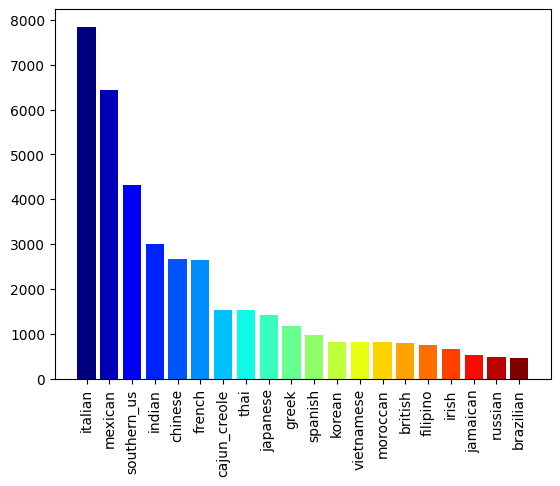

In [40]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

keypair = dict(train.cuisine.value_counts())

# Erstelle eine Liste mit den Farben, die auf die Bar-Höhen angewendet werden sollen.
# Die Farben werden in der Reihenfolge der Bar-Höhen angewendet.
colors = cm.jet(np.linspace(0, 1, len(keypair)))

# Zeichne die Bars und passe die Farben an.
plt.bar(keypair.keys(), keypair.values(), color=colors)

# Drehe die x-Ticks um 90 Grad.
plt.xticks(rotation = 90)

# Zeige das Diagramm an.
plt.show()

Es ist klar zu erkennen, dass die Daten nicht balanciert sind. Dies bedeutet, dass es für manche Klassen viele Datenpunkte gibt, während es für andere verhältnismäßig wenige gibt. Viele Machine-Learning-Algorithmen sind anfällig für diese Ungleichgewichtigkeit. Um dem entgegenzuwirken, können Methoden wie Resampling oder Class Weighting verwendet werden.

Anschließend soll die Verteilung und Häufigkeit von Zutaten untersucht werden.

In [41]:
#Erstelle eine Liste mit allen Zutaten insgesamt. Erstelle anschließend eine Menge ohne Duplikate
all_ingredients = set(train['ingredients'].sum())
#Sortiere die Liste
all_ingredients = sorted(all_ingredients)
print(f"Es gibt { len(all_ingredients)} unterschiedliche Zutaten")


Es gibt 6714 unterschiedliche Zutaten


In [42]:
#Gebe die ersten 20 Zutaten aus
for i, ingredient in enumerate(all_ingredients):
    print(ingredient)
    if i>20:
        break

(    oz.) tomato sauce
(   oz.) tomato paste
(10 oz.) frozen chopped spinach
(10 oz.) frozen chopped spinach, thawed and squeezed dry
(14 oz.) sweetened condensed milk
(14.5 oz.) diced tomatoes
(15 oz.) refried beans
1% low-fat buttermilk
1% low-fat chocolate milk
1% low-fat cottage cheese
1% low-fat milk
2 1/2 to 3 lb. chicken, cut into serving pieces
2% low fat cheddar chees
2% low-fat cottage cheese
2% lowfat greek yogurt
2% milk shredded mozzarella cheese
2% reduced-fat milk
25% less sodium chicken broth
33% less sodium cooked deli ham
33% less sodium cooked ham
33% less sodium ham
33% less sodium smoked fully cooked ham


Hier stechen die Mengenangaben hervor, diese könnten entfernt werden, um die Datenqualität zu steigern. Vermutlich ist die Menge einer Zutat nicht ausschlaggebend für das Herkunftsland eines Rezepts oder eines Restaurants.

In [43]:
#Gebe die letzten 20 Zutaten aus
for i, ingredient in enumerate(reversed(all_ingredients)):
    print(ingredient)
    if i>20:
        break

zucchini blossoms
zucchini
ziti
zinfandel
zesty italian dressing
zest
za'atar
yuzu juice
yuzu
yukon gold potatoes
yukon gold
yucca root
yucca
yuca
yu choy
young nettle
young leeks
young coconut meat
yoplait
yolk
yogurt low fat
yogurt dressing


In diesem Ausschnitt der Liste ist eine weitere Herausforderung erkennbar. Zutaten wie Yucca existieren mit einer oder zwei Cs. Es würde sich lohnen, diese Schreibweisen zu vereinen. Bei 6714 verschiedenen Zutaten ist das manuelle Heraussuchen und Vereinigen solcher Fälle ein enormer Aufwand. Möglicherweise gibt es eine Möglichkeit, diesen Prozess zu automatisieren.

Zusätzlich tauchen in der Liste auch Adjektive wie "young" auf. Das Entfernen dieser Adjektive würde wahrscheinlich helfen, die Anzahl der Zutaten zu reduzieren und sie aussagekräftiger zu machen. Alternativ könnte auch ein Modell verwendet werden, das resistent gegen solche Adjektive ist.

Nun sollen untersucht werden, welche Zutaten besonders häufig vorkommen, und wie lang die Rezeptlisten sind. Eine Möglichkeit, die Anzahl der Zutaten zu reduzieren, ist die Verwendung eines Distanzmaßes wie der Levenshtein-Distanz. Sehr ähnliche Wörter können so zusammengelegt werden.

In [44]:
import Levenshtein

def count_word_occurrences_levenstein(word_list, word_counts, max_distance):
    # Diese Funktion zählt die Anzahl der Vorkommen jedes Wortes in einer Liste von Wörtern,
    # unter Berücksichtigung einer bestimmten Levenshtein-Distanz.

    for word in word_list:
        # Die Variable `matched_word` wird auf `None` initialisiert.
        matched_word = None

        # Die Variable `min_distance` wird auf `unendlich` initialisiert.
        min_distance = float('inf')

        # Es wird über die Schlüssel im Wörterbuch `word_counts` iteriert.
        for key in word_counts:
            # Die Levenshtein-Distanz zwischen dem aktuellen Wort und dem Schlüssel wird berechnet.
            distance = Levenshtein.distance(word.lower(), key.lower())

            # Wenn die Distanz kleiner als die minimale Distanz ist,
            # werden die minimale Distanz und die Variable `matched_word` aktualisiert.
            if distance < min_distance:
                min_distance = distance
                matched_word = key

        # Wenn die minimale Distanz kleiner als oder gleich der maximalen Distanz ist,
        # wird die Zählung für das Wort `matched_word` im Wörterbuch `word_counts` erhöht.
        if min_distance <= max_distance and min_distance!=0:
            print(f"matched word {word} to {matched_word}")
            word_counts[matched_word] = word_counts.get(matched_word, 0) + 1
        # Ansonsten wird die Zählung für das aktuelle Wort im Wörterbuch `word_counts` erhöht.
        else:
            word_counts[word] = word_counts.get(word, 0) + 1

def count_word_occurrences(word_list, word_counts):
    # Diese Funktion zählt die Anzahl der Vorkommen jedes Wortes in einer Liste von Wörtern,
    # ohne Rücksicht auf eine Levenshtein-Distanz.

    for word in word_list:
        # Die Zählung für das aktuelle Wort im Wörterbuch `word_counts` wird erhöht.
        word_counts[word] = word_counts.get(word, 0) + 1

In [45]:
from tqdm.notebook import trange, tqdm
word_count_dict = {}

for row in tqdm(train.ingredients):
    count_word_occurrences(row, word_count_dict)
    #Diese Zeile ent-kommentieren um den Versuch mit der Levenstein-Distanz  zu starten
    #count_word_occurrences_levenstein(row, word_count_dict, 2)



  0%|          | 0/39774 [00:00<?, ?it/s]

Das Zusammenfassen ähnlicher Worte wie "Yucca" und "Yuca" mittels der Levenstein-Distanz war nicht zielführend. Daher wurde der Versuch auskommentiert, weil er die Ausführung stark verlangsamt.

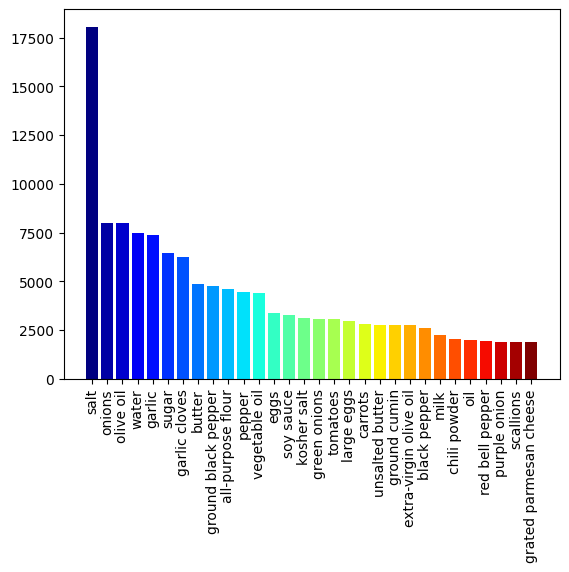

In [46]:
from itertools import islice
# Sortieren nach vorkommen
sorted_dict_descending = {k: v for k, v in sorted(word_count_dict.items(), key=lambda item: item[1], reverse=True)}

keypair = dict(islice(sorted_dict_descending.items(), 30))

# Erstelle eine Liste mit den Farben, die auf die Bar-Höhen angewendet werden sollen.
# Die Farben werden in der Reihenfolge der Bar-Höhen angewendet.
colors = cm.jet(np.linspace(0, 1, len(keypair)))

# Zeichne die Bars und passe die Farben an.
fig = plt.bar(keypair.keys(), keypair.values(), color=colors)

# Drehe die x-Ticks um 90 Grad.
plt.xticks(rotation = 90)

# Zeige das Diagramm an.
plt.show()

#print(dict(islice(sorted_dict_descending.items(), 30)))

Inspiriert von der Lösung durch den Kaggle nutzer KAVYA SREE [1] werden Küchen mit sehr wenigen oder vielen Zutaten gelöscht.

In [47]:
#no of Ingredients
train['ing_count'] = train['ingredients'].str.len()

train = train[train['ing_count'] > 1]
train = train[train['ing_count']<60]

train.to_json("cleaned_data.json")

## Vektorisierung

Bevor ein Modell trainiert werden kann, müssen die Zutaten Vektorisiert werden.

Die Herausforderung besteht darin, eine Liste von Strings in einen Vektor zu verwandeln, der für Machine Learning (ML) und Deep Learning (DL) nutzbar ist. Eine Möglichkeit, dies zu tun, ist das One-Hot-Encoding. Ein solcher Vektor kann dann von einer Vielzahl von ML-Algorithmen verwendet werden, wie z. B. Klassifizierung, Regression und Clustering.

In [48]:
from sklearn.preprocessing import OneHotEncoder
test_docs = [["Olive", "Yucca", "Salt"], ["Olive", "Yucca", "Sugar"]]

enc = OneHotEncoder(handle_unknown='ignore')
print(enc.fit_transform(test_docs).todense())

[[1. 1. 1. 0.]
 [1. 1. 0. 1.]]


Das obige Beispiel zeigt, wie One-Hot-Encoding für die Testdokumente in test_docs verwendet wird. Dabei wird jedem einzigartigen Wort im Dokument eine Spalte zugewiesen. Da es zwei Dokumente und vier unterschiedliche Wörter im Korpus gibt, ist das Ergebnis eine 2x4-Matrix.

Ein Dokument wird dargestellt, indem im jeweiligen Vektor eine 1 eingetragen wird, wenn das Wort der jeweiligen Spalte im Dokument existiert.


Bestehende gut performende Lösungen für die Kaggle-Wettbewerb "What's Cooking" verwenden Lemmatisierung, um die Anzahl der Features zu verringern, und TF-IDF-Vektorisierung, um eine Vektorisierung durchzuführen.

Lemmatisierung ist ein Verfahren, bei dem verschiedene Formen eines Wortes zu einer gemeinsamen Basisform zusammengefasst werden. Dies kann hilfreich sein, um die Anzahl der Features zu verringern, die verwendet werden, um ein Dokument zu beschreiben. TF-IDF-Vektorisierung ist eine Technik, bei der die Häufigkeit, mit der ein Wort in einem Dokument vorkommt, in Relation zur Anzahl der Dokumente, in denen das Wort vorkommt, gesetzt wird. Dies kann hilfreich sein, um die Bedeutung der einzelnen Wörter in einem Dokument zu erfassen.

Die Kombination von Lemmatisierung und TF-IDF-Vektorisierung hat sich als effektives Verfahren erwiesen, um die Leistung von Machine Learning-Modellen für die Textklassifizierung zu verbessern.

In [49]:
# copied from https://www.kaggle.com/code/kavyasreeb/whats-cooking
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True)
# sublinear_tf scaling addresses the problem that 20 occurrences of a word is probably not 20 times more important than 1 occurrence

In [50]:
test_docs = ["Olive Yucca Salt", "Olive Yucca Sugar"]

# Erzeuge die Sparse Matrix
vectorized_docs =  vectorizer.fit_transform(test_docs)

In [51]:
print(f"Die Sparse MAtrix die zurück gegeben wird hat die form{vectorized_docs.shape}")

print(vectorized_docs)

Die Sparse MAtrix die zurück gegeben wird hat die form(2, 4)
  (0, 1)	0.7049094889309326
  (0, 3)	0.5015489070943787
  (0, 0)	0.5015489070943787
  (1, 2)	0.7049094889309326
  (1, 3)	0.5015489070943787
  (1, 0)	0.5015489070943787


An diesem kleinen Beispiel ist zu sehen, wie die Textfrequenz-Inverse-Dokumentfrequenz-Vektorisierung (TF-IDF) Dokumente in eine Sparse-Matrix umwandelt. Eine Sparse-Matrix enthält nur Einträge, die einen Wert ungleich 0 haben. Die Matrix in diesem Beispiel enthält 8 Einträge, aber die Einträge an den Positionen (0,2) und (1,1) haben den Wert 0.

Jede Zeile in der Matrix stellt ein Dokument dar, das aus einer Zutatenliste besteht. Jede Spalte in der Matrix stellt ein Wort im Korpus dar. In diesem Beispiel gibt es 4 verschiedene Wörter, weshalb es 4 Spalten gibt.

Wörter, die zwei Mal in den Dokumenten vorkommen, erhalten einen kleineren Zahlenwert. Diese Eigenschaft kann wünschenswert sein, weil sie dazu führt, dass Wörter mit einer hohen Häufigkeit kleiner gewichtet werden. Häufige Wörter sind möglicherweise nicht besonders aussagekräftig für eine Vorhersage, weil sie über viele Klassen verteilt sind.

Bisherige Arbeiten haben gezeigt, dass die Verwendung von TF-IDF-Vektorisierung und Support-Vektor-Maschinen oder neuronalen Netzen zu einem Kaggle-Score von 0,8 und höher auf den Testdaten führen kann [1]. In diesem Abschnitt wird die Verwendung eines neuronalen Netzes in Kombination mit einer anderen Vektorisierungsmethode untersucht.

Anstelle von TF-IDF wird ein Embedding eines Transformer-Modells verwendet. Es ist anzunehmen, dass ein solches Embedding für die Zutaten "young nettle" und "nettle" ähnlich ist. So könnte ein Modell die Ähnlichkeit zwischen den beiden Begriffen lernen und eventuell korrekte Vorhersagen treffen. Neben der korrekten Vorhersage der Testdaten zur Einreichung bei Kaggle würde das Modell auch freiere Eingaben von Nutzern verarbeiten können, was es außerhalb des Wettbewerbs anwendbar macht.


Transformer-Modelle sind eine Art neuronales Netz, das für die Verarbeitung natürlicher Sprache entwickelt wurde. Sie wurden erstmals 2017 in dem Papier "Attention Is All You Need" von Vaswani et al. vorgestellt [2]. Transformer-Modelle sind besonders gut darin, lange Reihen von Wörtern zu verarbeiten und Beziehungen zwischen ihnen zu erkennen. Dies macht sie zu einer guten Wahl für eine Vielzahl von NLP-Aufgaben, wie z. B. Machine Translation, Text Summarization und Question Answering.

BERT (Bidirectional Encoder Representations from Transformers) ist ein Transformer-Modell, das von Google AI entwickelt wurde. Es wurde 2018 in dem Papier "BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding" von Devlin et al. vorgestellt [3]. BERT wurde auf einem riesigen Datensatz aus Text und Code trainiert und kann für eine Vielzahl von NLP-Aufgaben verwendet werden.

Satz-Embeddings sind eine Art Vektordarstellung eines Satzes. Sie sind extrahierbar, indem die Aktivierungen eines BERT-modells in einer bestimmten Schicht verwendet werden, nachdem ein eingabe Satz präsentiert wurde.

Es gibt mehrere Möglichkeiten, ein Embedding für Zutaten herzustellen. Eine Möglichkeit besteht darin, die Zutaten einzeln zu präsentieren und die entstehenden Embeddings elementweise zu mitteln. Dies ergibt einen Vektor mit fester Länge, der die Informationen aller Zutaten-Embeddings enthält. Eine andere Möglichkeit besteht darin, die Zutaten in einem Satz zu präsentieren, um ein Embedding zu erhalten.

Im folgenden wird ebenfalls untersucht, welchen Einfluss das BERT-Modell hat, das zum Embedden verwendet wird. Es werden zwei Modelle getestet:

   1. Ein BERT-Modell, das auf einem allgemeinen Textdatensatz trainiert wurde 'bert-base-nli-mean-tokens'

   2. CookBERT, ein BERT-Modell, das auf einem Rezeptdatensatz trainiert wurde [4]

CookBERT(https://github.com/paschistrobel/CookBERT) ist ein BERT-Modell, das auf dem RecipeNLG-Datensatz trainiert wurde. Dieser Datensatz enthält Rezepte aus verschiedenen Sprachen. CookBERT enthält daher einen erweiterten Tokensatz, der Wörter und Phrasen enthält, die in Rezepten typischerweise vorkommen. Darüber hinaus wurde CookBERT auf einem Domain-spezifischen Datensatz trainiert. Dies könnte dazu beitragen, die Vorhersagegenauigkeit zu verbessern, da das Modell die Beziehungen zwischen Zutaten besser verstehen kann.


# Modell und Training

Zuerst werden die benötigten Pakete installiert. Anschließend wird der Seed auf 0 festgelegt, um reproduzierbare Ergebnisse zu erhalten.

In [22]:
# für Deep Learning
import torch

# Für reproduzierbare Ergebnisse, den Seed festlegen
torch.manual_seed(0)

import tensorboard

# für Matrizen
import numpy as np
# Für Grafiken und Abbildungen
import matplotlib.pyplot as plt
# Zum Laden und vorverarbeiten von Dateien
from torch.utils.data import Dataset, DataLoader
#Für Tabellen
import pandas as pd

# Ignore warnings
import warnings

# Für Ladebalken
from tqdm.notebook import tqdm

# Für Transformer Modelle
from transformers import (
    BertTokenizerFast,
    BertForMaskedLM,
    pipeline,
)

warnings.filterwarnings("ignore")


In [23]:
# Installieren nötiger Pakete
import sys
!{sys.executable} -m pip install sentence-transformers
!{sys.executable} -m pip install unidecode



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from sentence_transformers import SentenceTransformer
# Für Lemmatisierung
from nltk.stem import WordNetLemmatizer
# Für reguläre Ausdrücke
import re
# Für einheitliche Character Representation
import unidecode
# für Text
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\phil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Die nächsten Schritte beinhalten das Laden der Daten und das on-the-fly Preprocessing. Die folgende Funktion aus [1] übertragen um Mengenangaben und Sonderzeichen zu entfernen. Zusätzlich werden die Zutaten Lemmatisiert.

In [32]:
lemmatizer = WordNetLemmatizer()
def preprocess(ingredients):
    ingredients = ' '.join(ingredients)
    ingredients = ingredients.lower() #Convert to lowercase
    ingredients = re.sub('[,\.!?:()"]', '',ingredients) # remove punctuation marks
    ingredients = re.sub('[^a-zA-Z"]',' ',ingredients) # remove all strings that contain a non-letter
    ingredients = ingredients.replace('-', ' ')
    words = []
    for word in ingredients.split():
        word = re.sub("[0-9]"," ",word) #removing numbers
        word = re.sub((r'\b(oz|ounc|ounce|pound|lb|inch|inches|kg|to)\b'), ' ', word) # Removing Units
        if len(word) <= 2: continue
        word = unidecode.unidecode(word)
        word = lemmatizer.lemmatize(word)
        if len(word) > 0: words.append(word)
    return words



Zunächst wird eine Klasse erstellt, die von torch.utils.data.DataLoader erbt. Diese Klasse verwaltet die Daten, die für das Training bereitgestellt werden. Der Konstruktor der Klasse erhält vier Argumente:

    1.Den Pfad zur JSON-Datei, die die Trainingsdaten enthält.
    2.Die Embedding-Methode: mean oder combine.
    3.Den Namen des BERT-Modells: None oder Cookbert.
    4.Eine Transform-Operation, um die Daten flexibel vorzubereiten (wird hier nicht verwendet).

Der DataLoader erstellt außerdem ClassWeights, um der Ungleichmäßigkeit der Daten entgegenzuwirken.

In dieser Klasse ist ein Caching implementiert, um das Training zu beschleunigen. Beim ersten Zugriff auf einen Datenpunkt wird das korrekte Embedding generiert und in einem Dictionary für nachfolgende Epochen gespeichert.


In [35]:
# Erkennen, ob eine GPU verfügbar ist um den Embeddingvorgang zu beschleunigen
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# kopiert aus der sBERT Dokumentation https://www.sbert.net/examples/applications/computing-embeddings/README.html
# Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask

class IngredientsEmbeddedDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, embedding_mode='mean', bert_model = None, transform=None):
        """
        Argumente:
            csv_file (string): Pfad zu der json datei welche die Daten enthält.
            embedding_mode (string): Wie die Zutatenliste zu einem Vektor zusammengeführt wird.
                                    mean für elementweises Mitteln.
                                    combine für Kombinieren zu einem Satz
            bert_model (string): encoder model.
                                Entweder CookBert (https://github.com/paschistrobel/CookBERT)
                                oder None für bert-base-nli-mean-tokens
            transform (callable, optional): Eine mögliche transformation
        """

        # Einlesen des Datensatzes
        self.data_frame = pd.read_json(csv_file)

        # Erstellen einer Liste mit allen möglichen Küchen herkünften
        classes = self.data_frame['cuisine'].unique()

        # Dieses Dictionary ordnet einer Küche einen Integer zu
        self.label_encoder_dict = {item : index for index,item in enumerate(classes)}

        #Die Anzahl der verschiedenen Küchen im gesamten Datensatz
        self.class_counts = self.data_frame.cuisine.value_counts()

        # Klassengewichte, klassen die oft vorkommen, erhalten einen kleineren Wert
        self.class_weights = {len(self.data_frame) / (len(classes)*self.class_counts[item]) for index,item in enumerate(classes)}

        # Eine Liste mit leeren Einträgen, einer für jede Zeile im Datensatz
        self.cached_embeddings = [None] * len(self.data_frame)


        self.transform = transform

        self.embedding_mode = embedding_mode

        self.encoder = bert_model

        if self.encoder == 'CookBert':
            # Preprocessor der einen String mit den Tokens ersetzt die dieses BERT modell versteht, wenn möglich
            self.CookBERT_tokenizer = BertTokenizerFast.from_pretrained("CookBERT-checkpoint", use_fast=True)
            # Das zum Download freigegebene Modell ist nicht für Sentence Embedding Konzipiert, deswegen verwenden wir nur den inneren teil des Netzwerks um an das Embedding zu kommen. Wir profitieren dennoch von den Topic spezifischen Gewichten
            self.CookBERT = BertForMaskedLM.from_pretrained("CookBERT-checkpoint")._modules['bert']

            # Beschleunigung durch Nutzen der Grafikkarte
            self.CookBERT.to(device)

        elif self.encoder is None:
            # Per Default wird bert-base-nli-mean-tokens verwendet
            self.model = SentenceTransformer('bert-base-nli-mean-tokens')
        else:
            # Fallback falls eine falsche eingabe getätigt wurde
            print(f"could not find requested model {bert_model}. falling back to default bert-base-nli-mean-tokens")
            self.model = SentenceTransformer('bert-base-nli-mean-tokens')
            self.encoder = None

    # Diese Funktion erzeugt ein Bert Embedding aus einem Satz, oder einer Liste von Sätzen
    def encode_sentence(self, sentence):
        if self.encoder == 'CookBert': #https://github.com/paschistrobel/CookBERT
            # Tokenisierung
            encoded_inputs = self.CookBERT_tokenizer(sentence, return_tensors="pt", padding=True, truncation=True).to(device)
            self.encoded_inputs = encoded_inputs

            embedding = self.CookBERT(**encoded_inputs)

            #Das embedding enthält auch Werte für "Leere" Tokens. Das ergebnis muss unter berücksichtigung dieser gemittelt werden um zu einem sinnvollen Vektor zu erzeugen
            mean_pooled_embedding = mean_pooling(embedding, self.encoded_inputs['attention_mask'])

            return mean_pooled_embedding.cpu().detach()
        elif self.encoder is None:
            # Dieses Modell hat das mitteln welches in mean_pooling ausgeführt sind fest eingebaut
            return self.model.encode(sentence, device=device)

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        # Die Liste der Zutaten für diesen Index
        ingredients = self.data_frame.iloc[idx].ingredients

        # Das Label für diesen Index
        cuisine = self.data_frame.iloc[idx].cuisine

        embedding = None

        # Wenn es ein embedding im Cache gibt, gebe dieses zurück
        if self.cached_embeddings[idx] is not None:
            embedding = self.cached_embeddings[idx]
            #print(f"cache hit for {idx}")
        elif self.embedding_mode == 'mean':
            #ansonsten erzeuge embeddings für die einzelnen zutaten nach vorverarbeitung
            ingredients = preprocess(ingredients)
            embeddings = self.encode_sentence(ingredients)
            # und erzeuge ein elementweisen gemittelten Vektor
            embedding = embeddings.mean(axis = 0)
            # dem cache hinzufügen für spätere Nutzung
            self.cached_embeddings[idx] = embedding
        elif self.embedding_mode == 'combine':
            # Vorverarbeitung der Zutaten
            ingredients = preprocess(ingredients)
            # Embedding als ganzer satz in natürlicher sprache
            embedding = self.encode_sentence('The kitchen uses the following ingredients' + ' '.join(ingredients)).squeeze()

            # dem cache hinzufügen für spätere Nutzung
            self.cached_embeddings[idx] = embedding
            #print(f"computed embedding for {idx}")

        sample = {'embedding': embedding,'target' : self.label_encoder_dict[cuisine]}

        if self.transform:
            sample = self.transform(sample)

        return sample

Aufgrund der Dateigrößenbeschränkung des Uploads muss das CookBERT-Modell unter diesem Link https://drive.google.com/drive/folders/1l1izk2hQp2AvLe0uFywoP0z3ZccMFng- heruntergeladen und im selben Verzeichnis wie dieses Notebook entpackt werden.

An dieser Stelle muss festgelegt werden, welche Kombination von Parametern verwendet wird. Um ein Experiment nachzustellen, muss von dieser Zelle bis zum schluss neu ausgeführt werden.

In [44]:
experiment_index = 0 # in diesem Fall wird das modell bert-base-nli-mean-tokens verwendet, und elementweises mitteln, um die einzelnen embeddings zu vereinen
#experiment_index = 1 # in diesem Fall wird das modell bert-base-nli-mean-tokens verwendet, und aus den Zutaten wird ein Satz gebildet welcher embedded wird
#experiment_index = 2 # in diesem Fall wird das modell CookBERT verwendet, und elementweises mitteln, um die einzelnen embeddings zu vereinen
#experiment_index = 4 # in diesem Fall wird das modell CookBERT verwendet, und aus den Zutaten wird ein Satz gebildet welcher embedded wird

In [45]:
if experiment_index == 0:
    experiment = "sBERTMean"
    full_training_set = IngredientsEmbeddedDataset("cleaned_data.json", embedding_mode="mean")
if experiment_index == 1:
    experiment = "sBERTCombine"
    full_training_set = IngredientsEmbeddedDataset("cleaned_data.json", embedding_mode="combine")
if experiment_index == 2:
    experiment = "CookBERTMean"
    full_training_set = IngredientsEmbeddedDataset("cleaned_data.json", embedding_mode="mean", bert_model="CookBert")
if experiment_index == 3:
    experiment = "CookBERTCombine"
    full_training_set = IngredientsEmbeddedDataset("cleaned_data.json", embedding_mode="combine", bert_model="CookBert")



Overfitting ist ein Phänomen, bei dem ein Machine-Learning-Modell auf Daten, die nicht während des Trainings verwendet wurden, schlechtere Vorhersagen macht. Dies liegt daran, dass das Modell die Trainingsdaten zu genau nachbildet und so seine Allgemeingültigkeit verliert. Um dem entgegenzuwirken, werden die zur Verfügung stehenden Daten normalerweise in einen Trainings- und einen Validierungsteil aufgeteilt.

Die Validierungsdaten werden nicht Teil des Trainings sein, sondern werden lediglich genutzt, um zu überprüfen, ob ein Overfitting stattgefunden hat. Der folgende Code zeigt das Aufteilen des Torch-Datasets in train_set und val_set. Anschließend wird jeweils ein Dataloader erstellt, der hilft, die Daten für das Training bereitzustellen. Die batch_size sollte so groß wie möglich gewählt werden, wobei die obere Grenze durch den Arbeitsspeicher der GPU definiert ist.


In [46]:

# Create data loaders for our datasets; shuffle for training, not for validation
validation_percentage = 5.0 # Benutze 5% der Daten zur Validierung

validation_count = int(len(full_training_set) * (validation_percentage / 100))

# Aufteilen des Datasets in einen teil für Training und einen für Validierung.
train_set, val_set = torch.utils.data.random_split(full_training_set, [len(full_training_set)-validation_count, validation_count])

# Die Dataloader helfen die Daten in Batches zu laden, und zu mischen.
# Für Training, die Daten mischen
training_subset_loader = torch.utils.data.DataLoader(train_set, batch_size=512, shuffle=True)
# Für Validierung, die Reihenfolge beibehalten
validation_subset_loader = torch.utils.data.DataLoader(val_set, batch_size=512, shuffle=False)



Beim betrachten eines Datenpunkts wird klar, dass ein BERT Embedding positive und negative Zahlen enthält.

In [47]:


printed_embeddings = 1
for i, sample in enumerate(tqdm(full_training_set)):

    #print(i, sample['cuisine'],sample['ingredients'])
    print(sample['embedding'].shape, sample['target'])
    print(sample['embedding'])
    if i == printed_embeddings -1:
        break

  0%|          | 0/39751 [00:00<?, ?it/s]

(768,) 0
[-1.90524295e-01 -6.51989281e-02  1.27674520e+00 -1.24554589e-01
  3.73213351e-01  6.62921846e-01 -2.49817342e-01  7.99747229e-01
 -1.01767574e-03 -2.75051534e-01 -4.90474880e-01  2.31138334e-01
  1.53103739e-01  5.59611917e-01  8.11972976e-01 -1.40400343e-02
 -6.82148695e-01 -5.25909550e-02  3.22890162e-01 -4.83122617e-01
 -1.62120610e-02  3.32211196e-01 -2.21825659e-01 -8.06639194e-01
  1.11540727e-01 -6.33463860e-01  2.13020161e-01 -1.17478907e+00
 -6.35280609e-02  3.03595178e-02 -6.98174536e-02  1.59737900e-01
  8.62149358e-01 -1.06159143e-01 -3.96090299e-01  3.53839576e-01
 -4.07787025e-01  1.24220192e-01 -7.98184872e-02  2.14330647e-02
  1.16096425e+00  1.39746994e-01  8.00622582e-01  3.77727807e-01
 -2.04026267e-01 -1.06574804e-01 -2.40956977e-01  5.81333816e-01
 -4.11853254e-01 -7.33925462e-01 -1.29015476e-01 -8.62234473e-01
  7.56316304e-01  3.91983718e-01 -4.80653077e-01  2.64380038e-01
  3.92631054e-01 -2.22520068e-01  6.30320311e-01  3.43350410e-01
  7.08644465e-03

Anschließend wird eine Netzarchitektur für ein Feed-Forward-Netz definiert. Die Aktivierungsfunktion LeakyReLU wird verwendet, um negative Eingaben besser zu verarbeiten. LeakyReLU ermöglicht eine schnellere und zuverlässigere Optimierung der Parameter als andere Aktivierungsfunktionen wie ReLU.

Das neuronale Netz besteht aus 4 versteckten Schichten und 20 Ausgabeneuronen mit einer LogSoftMax-Funktion. Zusätzlich wurde Dropout verwendet, um Overfitting zu vermeiden.

In [25]:
import torch.nn as nn
import torch.nn.functional as F


class NetDeeper2(nn.Module):

    def __init__(self):
        super(NetDeeper2, self).__init__()
        self.fc1 = nn.Linear(768, 1024)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(1024, 800)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(800, 512)
        self.dropout3 = nn.Dropout(0.2)
        self.fc4 = nn.Linear(512, 256)
        self.dropout4 = nn.Dropout(0.2)
        self.fc5 = nn.Linear(256, 20)
        self.log_soft_max = torch.nn.LogSoftmax()

    def forward(self, x):
        x = self.dropout1(x)
        x = F.leaky_relu(self.fc1(x)) #leaky relu because of negative input values
        x = self.dropout2(x)
        x = F.leaky_relu(self.fc2(x))
        x = self.dropout3(x)
        x = F.leaky_relu(self.fc3(x))
        x = self.dropout4(x)
        x = F.leaky_relu(self.fc4(x))
        x = self.fc5(x)
        return self.log_soft_max(x)



model = NetDeeper2()


print(model)

NetDeeper2(
  (fc1): Linear(in_features=768, out_features=1024, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=1024, out_features=800, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=800, out_features=512, bias=True)
  (dropout3): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=512, out_features=256, bias=True)
  (dropout4): Dropout(p=0.2, inplace=False)
  (fc5): Linear(in_features=256, out_features=20, bias=True)
  (log_soft_max): LogSoftmax(dim=None)
)


Als Verlustfunktion wird die negative Log-Wahrscheinlichkeits-Verlustfunktion (NLLLoss) verwendet. Die Klassenlabels werden im Ausgabevektor des neuronalen Netzes als Vektor mit der Länge K=20 ausgegeben. Die folgende Ausgabe zeigt, welcher Index für welche Klasse steht. Außerdem werden die Klassengewichte des Dataloaders übergeben. Klassengewichte sorgen dafür, dass die korrekte Vorhersage einer weniger repräsentierten Klasse stärker verstärkt wird als die einer stark repräsentierten Klasse.

Als Optimierer wurde Adam verwendet. Adam scheint deutlich schneller zu sein und bessere Ergebnisse zu liefern als SGD.

In [55]:
print(f"Die Klasse zählt als vorhergesagt, wenn der Wert des Ausgabe Vektors an der hier gelisteten Stelle der größte in der Zeile ist" +
      f"\n{full_training_set.label_encoder_dict}")

loss_fn = torch.nn.NLLLoss(weight=torch.FloatTensor(list(full_training_set.class_weights)))
optimizer = torch.optim.Adam(model.parameters())

Die Klasse zählt als vorhergesagt, wenn der Wert des Ausgabe Vektors an der hier gelisteten Stelle der größte in der Zeile ist
{'greek': 0, 'southern_us': 1, 'filipino': 2, 'indian': 3, 'jamaican': 4, 'spanish': 5, 'italian': 6, 'mexican': 7, 'chinese': 8, 'british': 9, 'thai': 10, 'vietnamese': 11, 'cajun_creole': 12, 'brazilian': 13, 'french': 14, 'japanese': 15, 'irish': 16, 'korean': 17, 'moroccan': 18, 'russian': 19}


Als nächstes werden die Trainingsfunktionen definiert. Sie folgen der Dokumentation von Torch und wurden nur leicht angepasst, um mit dem hier verwendeten Dataset zu funktionieren.

In [51]:
def train_one_epoch(epoch_index, tb_writer, epochs):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_subset_loader) instead of
    # iter(training_subset_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    loop = tqdm(training_subset_loader,desc=f"Epoch [{epoch_index}/{epochs}]")
    for i, data in enumerate(loop):

        # Every data instance is an input + label pair
        inputs, labels = data['embedding'],data['target']

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()
        loss_item = loss.item()
        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(training_subset_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

        loop.set_description(f"Epoch [{epoch_index}/{epochs}]")
        loop.set_postfix(loss=loss_item)

    return last_loss

In [15]:
from datetime import datetime
from torch.utils.tensorboard import SummaryWriter
import os

# Erstelle den Models Ordner falls er noch nicht existiert

if not os.path.isdir("Models"):
    os.makedirs("Models")

# Initializing in a separate cell so we can easily add more epochs to the same run
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter(f'runs/{experiment}_{timestamp}')
epoch_number = 0

EPOCHS = 100

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer, EPOCHS)


    running_vloss = 0.0
    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.
    model.eval()

    # Zähle Korrekte vorhersagen auf dem Validierungs Teil der daten
    correct = 0
    # Disable gradient computation and reduce memory consumption.
    with torch.no_grad():
        for i, vdata in enumerate(validation_subset_loader):
            vinputs, vlabels = vdata['embedding'],vdata['target']
            voutputs = model(vinputs)
            vloss = loss_fn(voutputs, vlabels)
            running_vloss += vloss
            # Erhöhe den Counter für jede korrekte vorhersage
            correct += (np.argmax(voutputs, axis=1) == vlabels).sum()  #enable if batching works

    # Genauigkeit der vorhersage auf den Validierungsdaten
    accuracy = correct / (len(validation_subset_loader)*validation_subset_loader.batch_size)
    print("Accuracy = {}".format(accuracy))

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))

    # Log the running loss averaged per batch
    # for both training and validation
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)

    #writer.add_scalars('Accuracy',
    #                { 'Training' : 0, 'Validation' : accuracy },
    #                epoch_number + 1)

    writer.flush()

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = f'Models/{experiment}_{timestamp}_{epoch_number}'
        torch.save(model.state_dict(), model_path)

    epoch_number += 1

NameError: name 'experiment' is not defined

Um die Modelle zu vergleichen, soll die Genauigkeit auf den Validierungsdaten verglichen werden. Zunächst soll das neueste Modell geladen werden.

In [26]:
def get_latest_file(filenames, title):
  """Finds the file with the most recent timestamp and highest int number, filtered by title."""

  latest_file = None
  latest_timestamp = datetime.min
  latest_int = -1

  for filename in filenames:
    if filename.startswith(title):
      parts = filename.split("_")
      timestamp = datetime.strptime('_'.join([parts[1], parts[2]]), "%Y%m%d_%H%M%S")
      int_number = int(parts[3])

      if timestamp > latest_timestamp or (timestamp == latest_timestamp and int_number > latest_int):
        latest_file = filename
        latest_timestamp = timestamp
        latest_int = int_number

  return latest_file


In [27]:
from os import walk

# Hole alle datei namen in Models/
model_files = []
for (dirpath, dirnames, filenames) in walk("Models"):
    model_files.extend(filenames)
    break


In [28]:
best_CookBert_mean_model_path = get_latest_file(model_files, "CookBERTMean")
best_CookBert_combine_model_path = get_latest_file(model_files, "CookBERTCombine")
best_sBert_mean_model_path = get_latest_file(model_files, "sBERTMean")
best_sBert_combine_model_path = get_latest_file(model_files, "sBERTCombine")

In [29]:
def load_and_test_model(path):
    # Modell laden
    model = NetDeeper2()
    model.load_state_dict(torch.load(path))

    running_vloss = 0.
    correct = 0.

    # Das modell nicht trainieren
    model.eval()

    with torch.no_grad():
        #vorhersage des validation_subsets
        for i, vdata in enumerate(validation_subset_loader):
            vinputs, vlabels = vdata['embedding'],vdata['target']
            voutputs = model(vinputs)
            vloss = loss_fn(voutputs, vlabels)
            running_vloss += vloss
            correct += (np.argmax(voutputs, axis=1) == vlabels).sum()  #enable if batching works

    accuracy = correct / (len(validation_subset_loader)*validation_subset_loader.batch_size)
    print("Accuracy for model {} is {}".format(path , accuracy))

In [56]:
validation_percentage = 5.0 # Benutze 5% der Daten zur Validierung

validation_count = int(len(full_training_set) * (validation_percentage / 100))

full_training_set = IngredientsEmbeddedDataset("cleaned_data.json", embedding_mode="mean")
train_set, val_set = torch.utils.data.random_split(full_training_set, [len(full_training_set)-validation_count, validation_count])
training_subset_loader = torch.utils.data.DataLoader(train_set, batch_size=512, shuffle=True)
validation_subset_loader = torch.utils.data.DataLoader(val_set, batch_size=512, shuffle=False)
load_and_test_model(f"Models/{best_sBert_mean_model_path}")

full_training_set = IngredientsEmbeddedDataset("cleaned_data.json", embedding_mode="combine")
train_set, val_set = torch.utils.data.random_split(full_training_set, [len(full_training_set)-validation_count, validation_count])
training_subset_loader = torch.utils.data.DataLoader(train_set, batch_size=512, shuffle=True)
validation_subset_loader = torch.utils.data.DataLoader(val_set, batch_size=512, shuffle=False)
load_and_test_model(f"Models/{best_sBert_combine_model_path}")

full_training_set = IngredientsEmbeddedDataset("cleaned_data.json", embedding_mode="mean", bert_model="CookBert")
train_set, val_set = torch.utils.data.random_split(full_training_set, [len(full_training_set)-validation_count, validation_count])
training_subset_loader = torch.utils.data.DataLoader(train_set, batch_size=512, shuffle=True)
validation_subset_loader = torch.utils.data.DataLoader(val_set, batch_size=512, shuffle=False)
load_and_test_model(f"Models/{best_CookBert_mean_model_path}")

full_training_set = IngredientsEmbeddedDataset("cleaned_data.json", embedding_mode="combine", bert_model="CookBert")
train_set, val_set = torch.utils.data.random_split(full_training_set, [len(full_training_set)-validation_count, validation_count])
training_subset_loader = torch.utils.data.DataLoader(train_set, batch_size=512, shuffle=True)
validation_subset_loader = torch.utils.data.DataLoader(val_set, batch_size=512, shuffle=False)
load_and_test_model(f"Models/{best_CookBert_combine_model_path}")

KeyboardInterrupt: 

Accuracy for model Models/sBERTMean_20230807_171359_56 is 0.6572265625
Accuracy for model Models/sBERTCombine_20230807_183601_26 is 0.60595703125
Accuracy for model Models/CookBERTMean_20230807_175057_88 is 0.63134765625
Accuracy for model Models/CookBERTCombine_20230807_191100_29 is 0.724609375


# Ergebnis:

Die Ergebnisse zeigen, dass die TFIDF-Vektorisierung genauere Vorhersagen liefert als ein BERT-Embedding. Die Verwendung eines Topic-spezifischen BERT Transformers mit einem Embedding der Zutaten als kombinierter Satz, hat die Vorhersagegenauigkeit erhöht. Mit ca 72% Accuracy ist die Genauigkeit allerdings weit hinter den Implementationen welche TFIDF-Vektorisierung verwenden. Diese können bis 82% genauigkeit Erreichen [1].

Darüber hinaus wurden verschiedene Techniken untersucht, um eine Liste von Zutaten in ein Embedding umzuwandeln. Die folgenden Varianten wurden untersucht:
1. Embedding der einzelnen Zutaten und Mittelung der Embeddings, um ein Gesamtembedding zu erhalten.
2. Embedding eines Satzes, der alle Zutaten enthält.

Variante zwei scheint besonders in Verbindung mit dem Topic spezifischen Modell gut zu synergieren. Dies ist vermutlich darauf zurückzuführen das BERT modelle auf Sätze trainiert wurden anstatt auf einzelne Wörter. Zusätzlich sind längere Sequenzen vermutlich besser für Transformer zu verarbeiten.

# Aussicht und folgende experimente:

Eine mögliche Weiterentwicklung wäre die Verwendung eines BERT-Modells, das mit Sicherheit alle Tokens in diesem Datensatz kennt. Dazu könnten Wikipedia-Einträge oder Kochrezepte von Rezeptwebsites gesammelt werden, die die Tokens enthalten. Masked Token Prediction könnte die Repräsentation des Sprachmodells für diese neuen Tokens festigen. Möglicherweise kann ein Embedding eines solchen Modells eine wettbewerbsfähige Vorhersagegenauigkeit erzielen.

# Literaturverzeichnis

[1] @misc{Kavyasreeb_2021, title={Whats cooking???}, url={https://www.kaggle.com/code/kavyasreeb/whats-cooking}, journal={Kaggle}, publisher={Kaggle}, author={Kavyasreeb}, year={2021}, month={Jul}}

[2] @inproceedings{46201,
title	= {Attention is All You Need},
author	= {Ashish Vaswani and Noam Shazeer and Niki Parmar and Jakob Uszkoreit and Llion Jones and Aidan N. Gomez and Lukasz Kaiser and Illia Polosukhin},
year	= {2017},
URL	= {https://arxiv.org/pdf/1706.03762.pdf}
}

[3] @inproceedings{47751,
title	= {BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding},
author	= {Jacob Devlin and Ming-Wei Chang and Kenton Lee and Kristina N. Toutanova},
year	= {2018},
URL	= {https://arxiv.org/abs/1810.04805}
}

[4] @misc{Paschistrobel_2022, title={Paschistrobel/cookbert: Domain specific Bert Model for the cooking domain}, url={https://github.com/paschistrobel/CookBERT}, journal={GitHub}, author={Paschistrobel}, year={2022}, month={Sep}}


